In [1]:
import os
import glob
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from multiprocessing import Pool
from matplotlib import pylab as plt
from collections import Counter
%matplotlib inline

In [5]:
DATA_PATH = "../../../Data/LJSpeech-1.1/wavs/"
META_PATH = "../../../Data/LJSpeech-1.1/metadata.csv"
NUM_PROC = 8

In [6]:
file_names = glob.glob(os.path.join(DATA_PATH, "*.wav"))
print(" > Number of audio files: {}".format(len(file_names)))

 > Number of audio files: 13100


In [7]:
meta_f = open(META_PATH, 'r', encoding='utf8')
meta = [m.split("|") for m in meta_f.readlines()]

In [8]:
def load_item(item):
    file_name = item[0]
    text = item[2]
    audio = librosa.load(os.path.join(DATA_PATH, file_name+'.wav'))
    sr = audio[1]
    audio = audio[0]
    audio_len = len(audio) / sr
    text_len = len(text)
    return text, text_len, audio, audio_len

# This will take a while depending on size of dataset
if NUM_PROC == 1:
    data = []
    for m in tqdm(meta):
        data += [load_item(m)]
else:
    with Pool(8) as p:
        data = list(tqdm(p.imap(load_item, meta), total=len(meta)))

In [9]:
# count words in the dataset
w_count = Counter()
for item in tqdm(data):
    text = item[0].lower()
    for word in text.split():
        w_count[word] += 1
print(" > Number of words: {}".format(len(w_count)))


 > Number of words: 22943


In [10]:
text_vs_durs = {}  # text length vs audio duration
text_len_counter = Counter()  # number of sentences with the keyed length
for item in tqdm(data):
    text = item[0].lower()
    text_len = len(text)
    text_len_counter[text_len] += 1
    audio_len = item[-1]
    try:
        text_vs_durs[text_len] += [audio_len]
    except:
        text_vs_durs[text_len] = [audio_len]

In [11]:
# text_len vs avg_audio_len, median_audio_len, std_audio_len
text_vs_avg = {}
text_vs_median = {}
text_vs_std = {}
for key, durs in text_vs_durs.items():
    text_vs_avg[key] = np.mean(durs)
    text_vs_median[key] = np.median(durs)
    text_vs_std[key] = np.std(durs)

### Plot Dataset Statistics

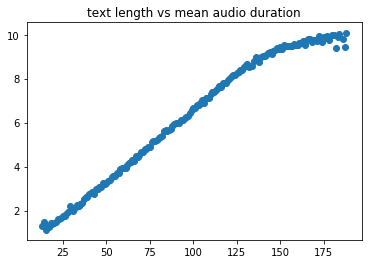

In [12]:
plt.title("text length vs mean audio duration")
plt.scatter(list(text_vs_avg.keys()), list(text_vs_avg.values()))

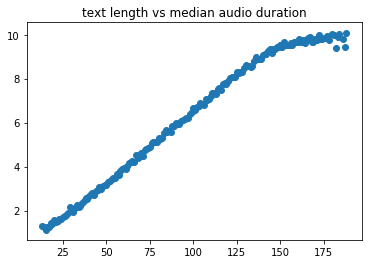

In [13]:
plt.title("text length vs median audio duration")
plt.scatter(list(text_vs_median.keys()), list(text_vs_median.values()))

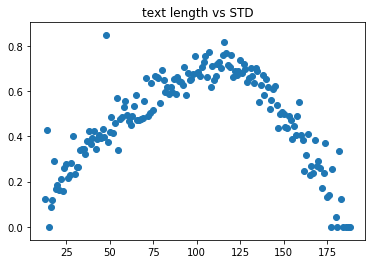

In [14]:
plt.title("text length vs STD")
plt.scatter(list(text_vs_std.keys()), list(text_vs_std.values()))

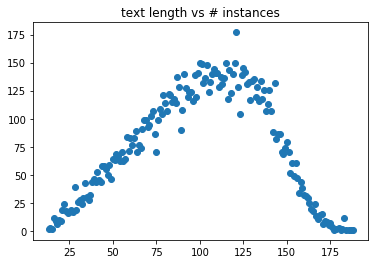

In [15]:
plt.title("text length vs # instances")
plt.scatter(list(text_len_counter.keys()), list(text_len_counter.values()))

### Check words frequencies

In [17]:
w_count_df = pd.DataFrame.from_dict(w_count, orient='index')
w_count_df.sort_values(0, ascending=False, inplace=True)

In [18]:
w_count_df

,0
the,18299
of,8709
and,6402
to,6282
in,4778
a,4279
was,3731
that,2888
he,2711
his,2023


In [25]:
# check a certain word
w_count_df.at['minute', 0]

11

In [ ]:
# fequency bar plot - it takes time!!
w_count_df.plot.bar()